<a href="https://colab.research.google.com/github/arunmalik1/PlantLeaf_Classification/blob/main/PlantLeaf_Classification_BestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is binary classification project using plant images. The idea is to be able to identify diseased vs healthy plants. There are 11 different plants and the entire dataet is divded into 22 categories. 

The dataset is from Kaggle: 
This is a collection of about 4503 images of which contains 2278 images of healthy leaf and 2225 images of the diseased leaf. Twelve plants named as Mango, Arjun, Alstonia Scholaris, Guava, Bael, Jamun, Jatropha, Pongamia Pinnata, Basil, Pomegranate, Lemon, and Chinar have been selected. Images are split between training, test, validating and prediction datasets for model training and testing purposes.



#Import Packages

In [1]:
#install and upgrade packages 

#need pydicom for images
!pip install pydicom --quiet

#install opendatasets to get the data from Kaggle
!pip install opendatasets --upgrade --quiet

#installing keras tuner 
!pip install keras-tuner --quiet
!pip install -q -U keras-tuner --quiet
!pip install git+https://github.com/keras-team/keras-preprocessing.git --quiet
!pip install --upgrade transformers --quiet
!pip install --upgrade datasets --quiet
!pip install -Uqq fastbook --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:

In [2]:
#import packages 
import pandas as pd
import numpy as np
import scipy
from fastbook import *


#import plot 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
%matplotlib inline
from PIL import Image
import PIL.Image
import seaborn as sns
from tabulate import tabulate
import os
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

#import keras and tenserflow and pydicom
import keras
import pydicom
import keras_tuner as kt
from keras import layers
from kerastuner import RandomSearch
from keras.utils import to_categorical
from keras.callbacks import learning_rate_schedule
from kerastuner.engine.hyperparameters import HyperParameters


#import tenserflow functions
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization




<ipython-input-2-90d8f49e3433>:29: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


#Import Data

In [3]:
#load the data 
import opendatasets as od
od.download("https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification?select=Plants_2", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arunmalik78
Your Kaggle Key: ··········


100%|██████████| 6.56G/6.56G [00:53<00:00, 131MB/s]


In [6]:
#load the train set
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/train',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256),
    batch_size = 32)

Found 4274 files belonging to 22 classes.


In [7]:
#load the test set
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/test',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


In [8]:
#load the validation set
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/valid',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


#Create a base CNN Model

In [ ]:
base_model1 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model1.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
base_model1.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
base_model1.add(Conv2D(64, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(128, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(256, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model1.add(Flatten())
base_model1.add(Dense(64, activation='relu'))
base_model1.add(Dense(22, activation='softmax'))

In [ ]:
base_model1.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn = base_model1.fit(train_ds, epochs= 20, validation_data= validation_ds)

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
base_model1.save('BaseModel.h5')

#Building in a simpler base model because of over fitting 

In [ ]:
base_model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
# define 3x3 filter window sizes. Create 32 filters.
base_model2.add(MaxPooling2D((2, 2)))
base_model2.add(Conv2D(32, (3, 3), activation='relu'))

base_model2.add(MaxPooling2D((2, 2)))
base_model2.add(Conv2D(32, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model2.add(Flatten())
base_model2.add(Dense(32, activation='relu'))
base_model2.add(Dense(22, activation='softmax'))

In [ ]:
base_model2.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn = base_model2.fit(train_ds, epochs= 20, validation_data= validation_ds)

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Use regularizer techniques 

L1 (Lasso Regression)

In [ ]:
reg = L1(1e-5)

In [ ]:
L1_model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L1_model.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (3,3),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
L1_model.add(BatchNormalization())
L1_model.add(MaxPooling2D(pool_size=(4, 4)))
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model.add(BatchNormalization())
L1_model.add(MaxPooling2D((2, 2)))
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L1_model.add(Flatten())
L1_model.add(Dense(64, activation='relu'))
L1_model.add(Dropout(0.5)) 
L1_model.add(Dense(22, activation='softmax'))

In [ ]:
opt = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L1_model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn = L1_model.fit(train_ds, epochs= 50, validation_data= validation_ds)

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Add data augmentation to further enchance model capabilities

L1 (Lasso Regression) + Data Augmentation

In [9]:
reg = L1(3e-5)

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [11]:
L1_model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L1_model2.add(Conv2D(filters=32, kernel_size=(3, 3), strides = (2,2),
                     activation='relu', input_shape=(256, 256, 3),
                     kernel_regularizer = reg))

# max pool in 2x2 window
L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D(pool_size=(4, 4)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D((2, 2)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D((2, 2)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L1_model2.add(Flatten())
L1_model2.add(Dense(64, activation='relu'))
L1_model2.add(Dropout(0.6)) 
L1_model2.add(Dense(22, activation='softmax'))

In [12]:
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L1_model2.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [13]:
history_cnn = L1_model2.fit(train_ds, epochs= 50, validation_data= validation_ds)

Epoch 1/50
134/134 [==============================] - 48s 327ms/step - loss: 3.5432 - accuracy: 0.0767 - val_loss: 3.1581 - val_accuracy: 0.0909
Epoch 2/50
134/134 [==============================] - 47s 329ms/step - loss: 2.9369 - accuracy: 0.1561 - val_loss: 2.8941 - val_accuracy: 0.1273
Epoch 3/50
134/134 [==============================] - 46s 326ms/step - loss: 2.7108 - accuracy: 0.2188 - val_loss: 2.6859 - val_accuracy: 0.2182
Epoch 4/50
134/134 [==============================] - 47s 328ms/step - loss: 2.5128 - accuracy: 0.2588 - val_loss: 2.5144 - val_accuracy: 0.2727
Epoch 5/50
134/134 [==============================] - 47s 329ms/step - loss: 2.3553 - accuracy: 0.3044 - val_loss: 2.3529 - val_accuracy: 0.3091
Epoch 6/50
134/134 [==============================] - 48s 338ms/step - loss: 2.1814 - accuracy: 0.3608 - val_loss: 2.1737 - val_accuracy: 0.4000
Epoch 7/50
134/134 [==============================] - 48s 336ms/step - loss: 2.0691 - accuracy: 0.3832 - val_loss: 2.0426 - val_ac

In [14]:
L1_model2.evaluate(validation_ds)

4/4 [==============================] - 1s 23ms/step - loss: 0.9357 - accuracy: 0.7364


[0.9356732368469238, 0.7363636493682861]

In [15]:
L1_model2.evaluate(test_ds)

4/4 [==============================] - 1s 23ms/step - loss: 0.7553 - accuracy: 0.7818


[0.7552722692489624, 0.7818182110786438]

In [18]:
L1_model2.save('/content/gdrive/MyDrive/Colab Notebooks/Plant_Leaf_Classitication/Models')

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


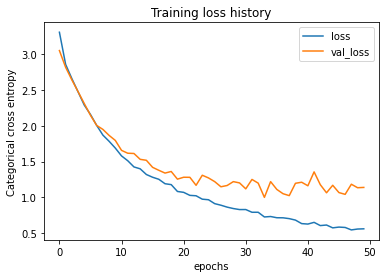

In [172]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

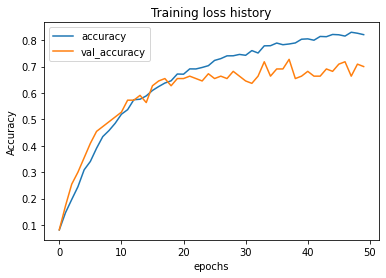

In [173]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [211]:
test_generator = ImageDataGenerator()
img_width, img_height = 256, 256
test_data_generator = test_generator.flow_from_directory(
     '/content/plant-leaves-for-image-classification/Plants_2/valid',
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = L1_model2.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 110 images belonging to 22 classes.
4/4 [==============================] - 33s 8s/step


In [212]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

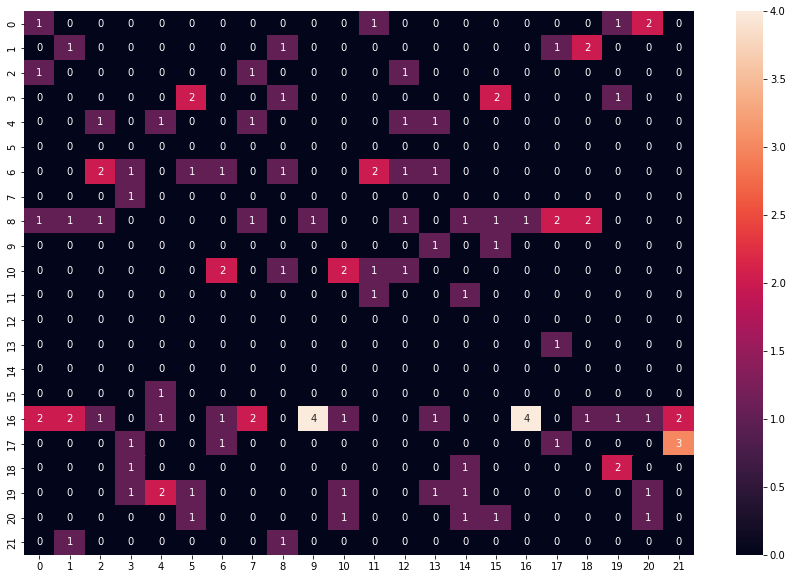

In [213]:
plt.figure(figsize=(15, 10))
ax= plt.subplot()
sns.heatmap(confusion_matrix(predicted_classes, true_classes), annot=True, fmt='g', ax=ax)

In [177]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       1.00      0.80      0.89         5
 Alstonia Scholaris healthy (P2b)       0.83      1.00      0.91         5
             Arjun diseased (P1a)       0.80      0.80      0.80         5
              Arjun healthy (P1b)       0.83      1.00      0.91         5
              Bael diseased (P4b)       1.00      0.40      0.57         5
               Basil healthy (P8)       0.71      1.00      0.83         5
           Chinar diseased (P11b)       0.33      0.40      0.36         5
            Chinar healthy (P11a)       0.67      0.40      0.50         5
             Gauva diseased (P3b)       0.57      0.80      0.67         5
              Gauva healthy (P3a)       0.80      0.80      0.80         5
             Jamun diseased (P5b)       0.29      0.80      0.42         5
              Jamun healthy (P5a)       0.00      0.00      0.00         5
          Jatropha disea

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
L1_model2.save('BestL1Model.h5')

#L2 (Ridge Regression) regularizer with Augmentation

In [192]:
#setup a regularizer 
reg = L2(3e-5)

In [193]:
#since I only have 4K data points for 22 classifications, using augments to create more data
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [194]:
#making a learning rate schedule to decay the learning rate 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=50,
    decay_rate=0.9)

In [195]:
L2_model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L2_model.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3),
                        kernel_regularizer = reg))

# max pool in 2x2 window
L2_model.add(BatchNormalization())
L2_model.add(MaxPooling2D(pool_size=(4, 4)))
data_augmentation
L2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

#L2_model.add(BatchNormalization())
#L2_model.add(MaxPooling2D((2, 2)))
#data_augmentation
#L2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L2_model.add(Flatten())
L2_model.add(Dense(64, activation='relu'))
L1_model2.add(Dropout(0.6)) 
L2_model.add(Dense(22, activation='softmax'))

In [197]:
opt = Adam(learning_rate = lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L2_model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])


In [198]:
history_cnn = L2_model.fit(train_ds, epochs= 50, validation_data= validation_ds)

Epoch 1/50
134/134 [==============================] - 50s 351ms/step - loss: 2.4366 - accuracy: 0.3084 - val_loss: 2.9401 - val_accuracy: 0.2273
Epoch 2/50
134/134 [==============================] - 50s 354ms/step - loss: 1.2970 - accuracy: 0.6259 - val_loss: 1.9748 - val_accuracy: 0.5091
Epoch 3/50
134/134 [==============================] - 50s 354ms/step - loss: 0.8184 - accuracy: 0.7756 - val_loss: 1.7359 - val_accuracy: 0.5545
Epoch 4/50
134/134 [==============================] - 51s 356ms/step - loss: 0.6087 - accuracy: 0.8372 - val_loss: 1.6258 - val_accuracy: 0.6091
Epoch 5/50
134/134 [==============================] - 50s 351ms/step - loss: 0.4753 - accuracy: 0.8858 - val_loss: 1.6268 - val_accuracy: 0.6273
Epoch 6/50
134/134 [==============================] - 50s 354ms/step - loss: 0.4027 - accuracy: 0.9073 - val_loss: 1.6221 - val_accuracy: 0.6545
Epoch 7/50
134/134 [==============================] - 50s 353ms/step - loss: 0.3588 - accuracy: 0.9207 - val_loss: 1.6344 - val_ac

KeyboardInterrupt: ignored

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
test_generator = ImageDataGenerator()
img_width, img_height = 256, 256
test_data_generator = test_generator.flow_from_directory(
     '/content/plant-leaves-for-image-classification/Plants_2/valid',
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = L2_model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
plt.figure(figsize=(15, 10))
ax= plt.subplot()
sns.heatmap(confusion_matrix(predicted_classes, true_classes), annot=True, fmt='g', ax=ax)

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [ ]:
L2_model.save('L2Model.h5')

#Evalute on the test set

In [207]:
L1_model2.evaluate(test_ds)

4/4 [==============================] - 1s 23ms/step - loss: 3.2805 - accuracy: 0.0727


[3.2804791927337646, 0.072727270424366]